# Kernel Support Vector Machines
Apply 4-fold cross-validation to the provided training data subset to train your classifiers and
identify their optimal parameters. In addition to the classifier’s parameters (e.g. regularization,
kernel, Number of layers/nodes, learning rate, etc.), you should also consider the following 4 ways
to preprocess and rescale the data:
- No preprocessing
- StandardScaler
- RobustScaler
- MinMaxScaler

import libraries

In [3]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn_evaluation
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

import heapq


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


setup data

In [4]:
X_train = pd.read_csv("./dataset/X_train.csv").values
y_train = pd.read_csv("./dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./dataset/X_test.csv").values
y_test = pd.read_csv("./dataset/y_test.csv").values.ravel()

general methods

In [5]:
def shape_params_linear_kernel(c_values):
    hyper_params = dict(C=c_values)
    return hyper_params


def shape_params_polynomial_kernel(c_values, d_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['D'] = d_values
    return hyper_params


def shape_params_radial_kernel(c_values, gamma_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['gamma'] = gamma_values
    return hyper_params


def run_grid_svm(kernel, hyper_parameters):
    classifier = SVC(
        kernel=kernel,
        random_state=0
    )
    grid_search = GridSearchCV(
        classifier,
        hyper_parameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, hyper_parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train score: ", grid_search.cv_results_['mean_train_score'])
    print("Test score: ", grid_search.cv_results_['mean_test_score'])



In [ ]:
# scaler_standard = StandardScaler()
# scaler_standard.fit(X_train)
# X_train_scaled_standard = scaler_standard.transform(X_train)

svm = SVC(C=1, kernel='linear')
svm.fit(X_train, y_train)
% time print('Accuracy test: ', svm.score(X_test, y_test))

## Kernel Selection
vary only the C values to point in the direction of the best kernel up front

### C-only GridSearch on linear

In [ ]:
# %time grid_results_svm_linear = run_grid_svm( 'linear', shape_params_linear_kernel(np.linspace(0,100,2)) )

PCA Eigen

NameError: name 'sklearnPCA' is not defined

## Standard Scaler

PCA vanilla

In [1]:
from sklearn.decomposition import PCA

pca_standard = PCA(n_components=2)
pca_standard.fit(X_train)

X_train_pca_scaler = pca_standard.fit_transform(X_train)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(16, 16))
mglearn.discrete_scatter(X_train_pca_scaler[:, 0], X_train_pca_scaler[:, 1], y_train)
# plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


NameError: name 'X_train' is not defined

PCA with standard

Text(0, 0.5, 'Second principal component')

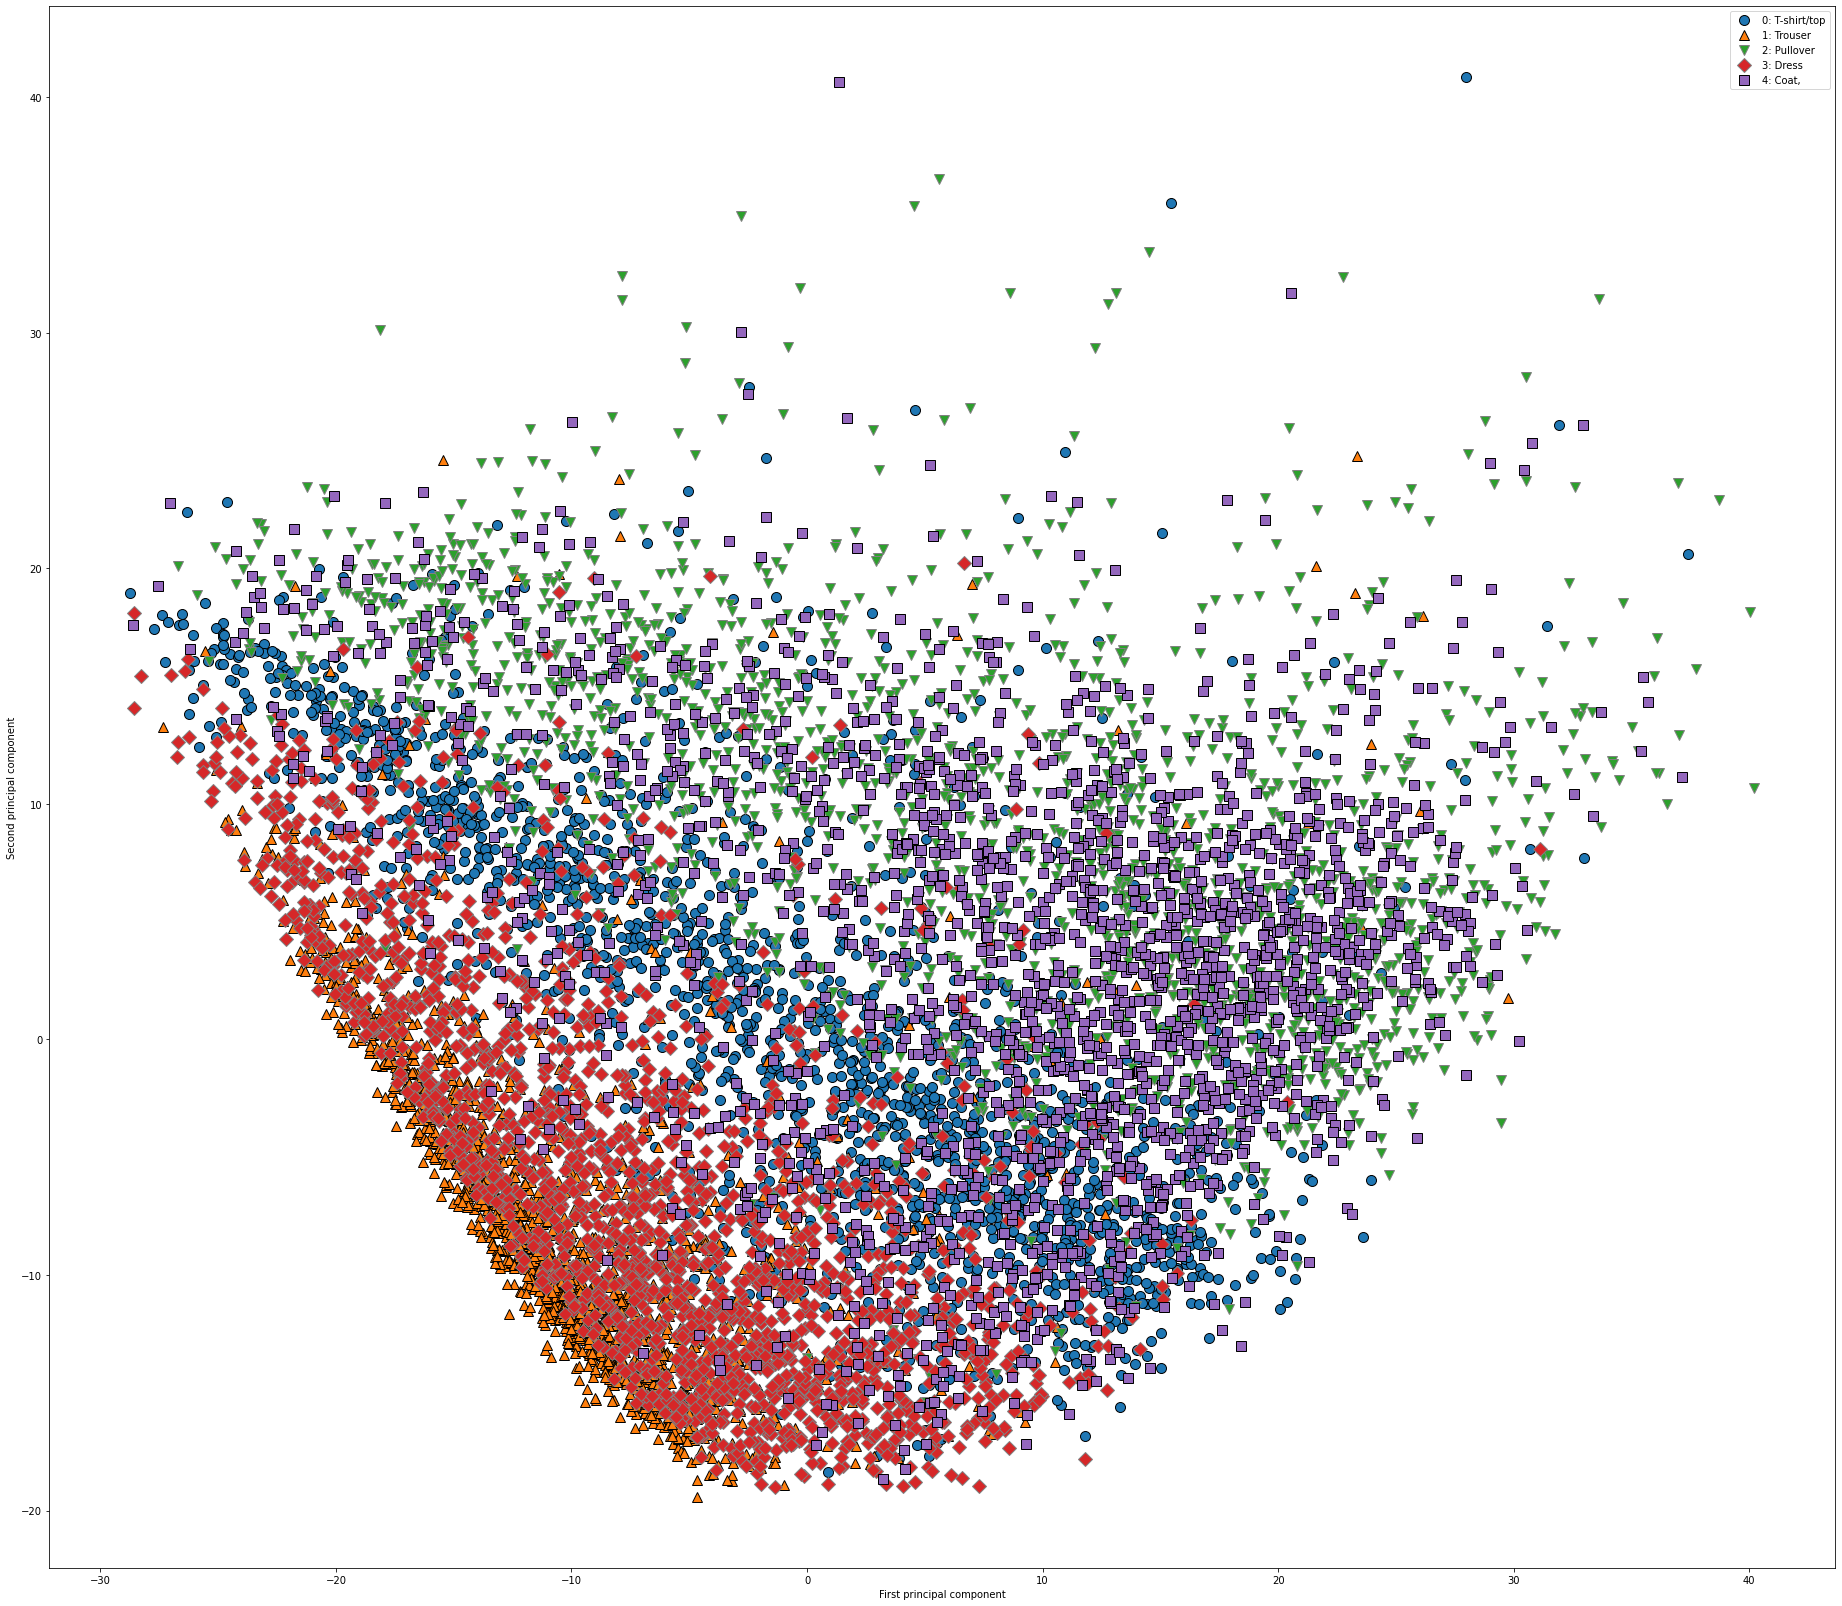

In [7]:
scaler_standard = StandardScaler()
scaler_standard.fit(X_train)
X_train_scaled_standard = scaler_standard.transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

pca_standard = PCA(n_components=2)
pca_standard.fit(X_train_scaled_standard)

X_train_pca_scaler = pca_standard.fit_transform(X_train_scaled_standard)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(32, 32))
mglearn.discrete_scatter(X_train_pca_scaler[:, 0], X_train_pca_scaler[:, 1], y_train)
plt.legend(
    [
        '0: T-shirt/top',
        '1: Trouser',
        '2: Pullover',
        '3: Dress',
        '4: Coat,',
    ],
    loc="best"
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


## Robust Scaler

Text(0, 0.5, 'Second principal component')

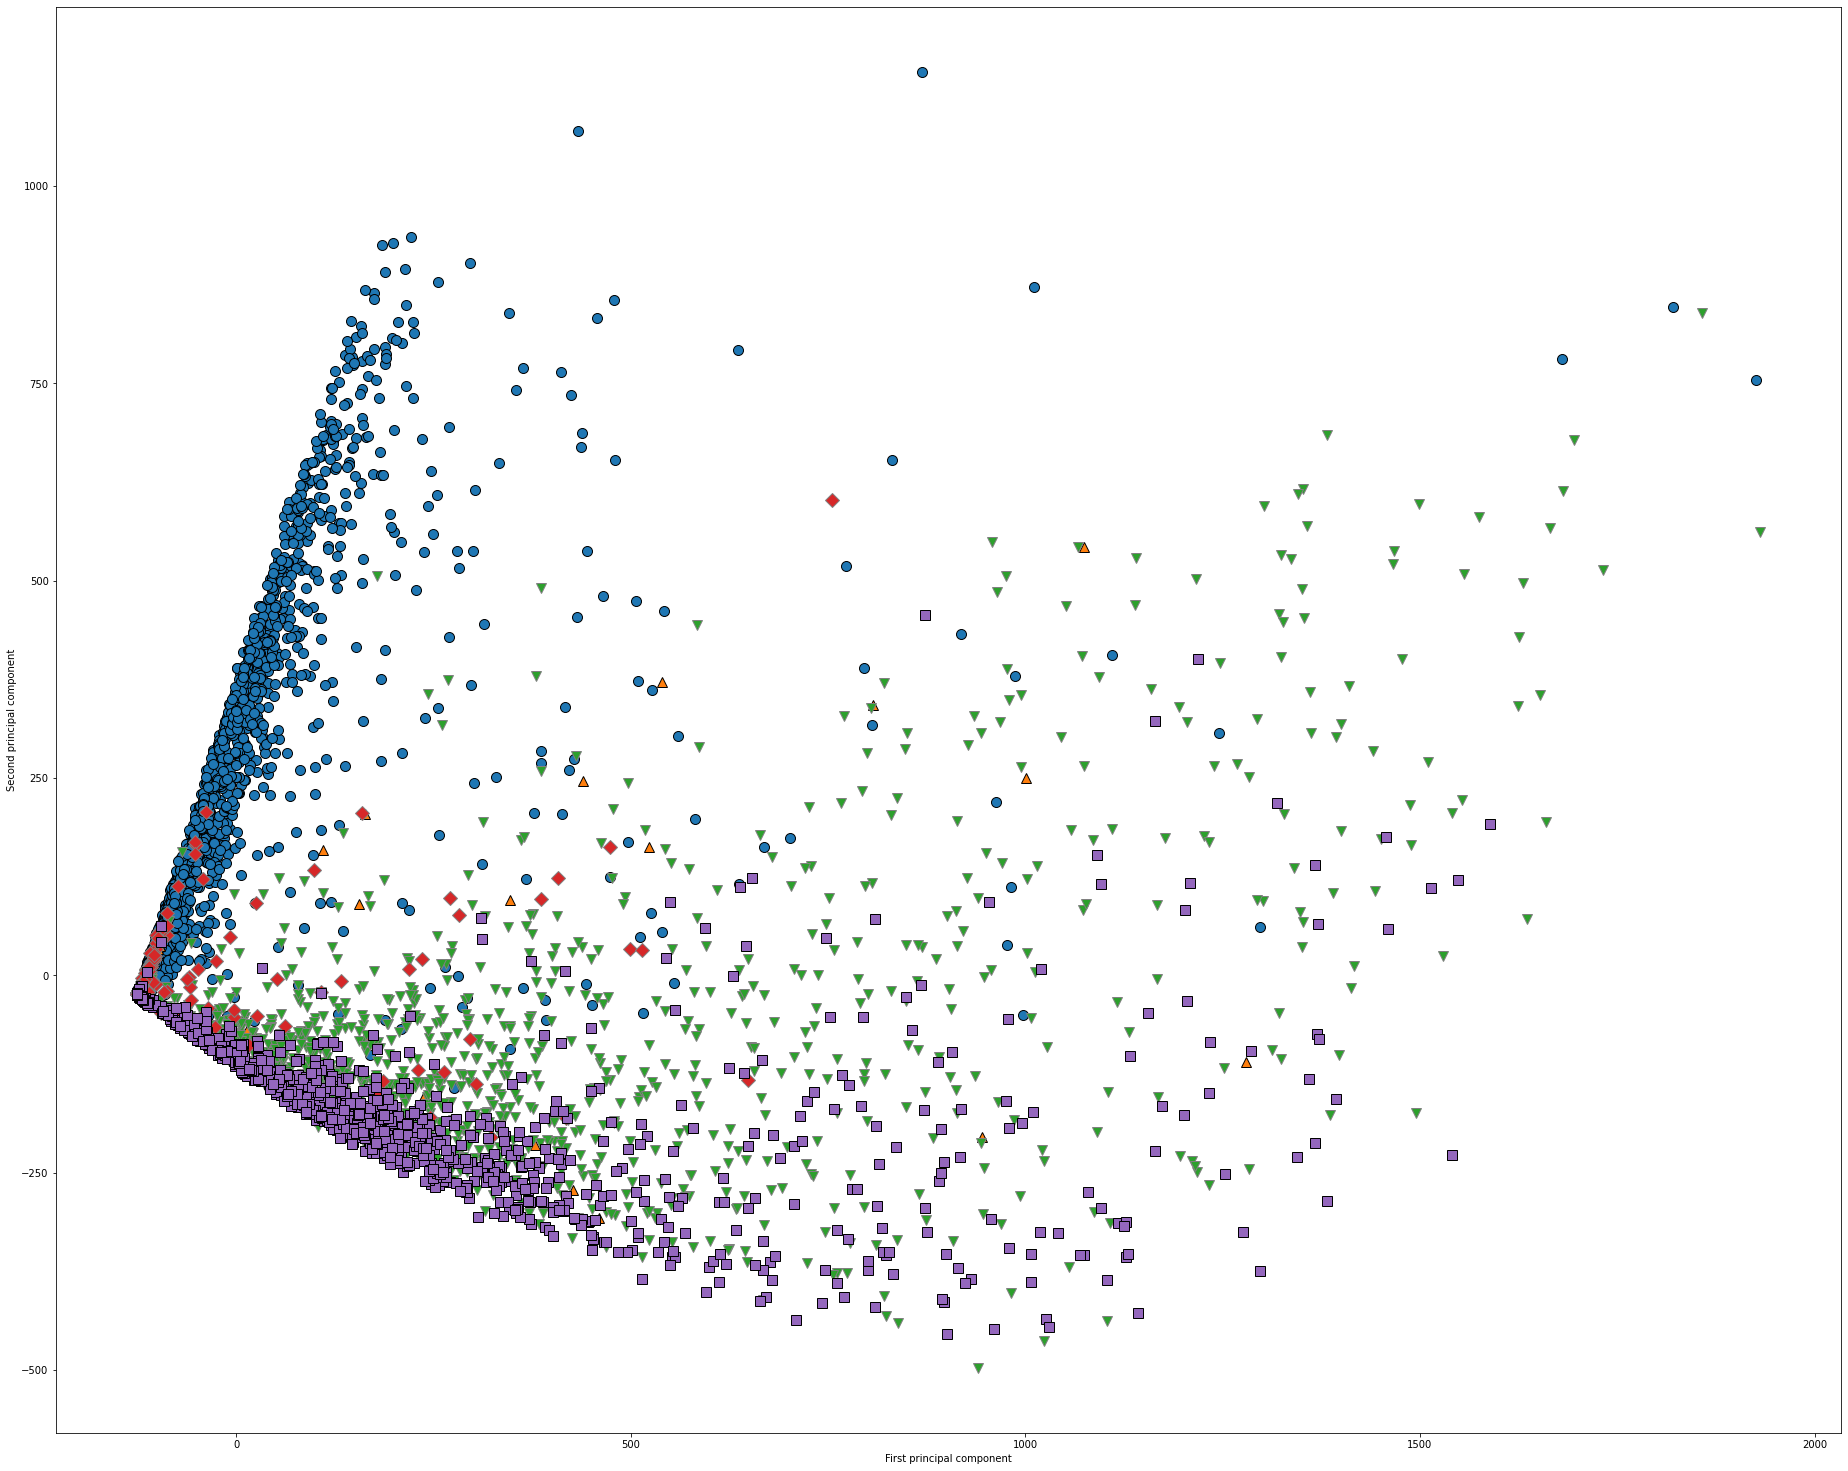

In [25]:

from sklearn.decomposition import PCA

scaler_robust = RobustScaler()
scaler_robust.fit(X_train)
X_train_scaled_robust = scaler_robust.transform(X_train)

pca_robust = PCA(n_components=2)
pca_robust.fit(X_train_scaled_robust)

X_train_pca_robust = pca_robust.transform(X_train_scaled_robust)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(32, 32))
mglearn.discrete_scatter(X_train_pca_robust[:, 0], X_train_pca_robust[:, 1], y_train)
# plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


## MinMax Scaler

Text(0, 0.5, 'Second principal component')

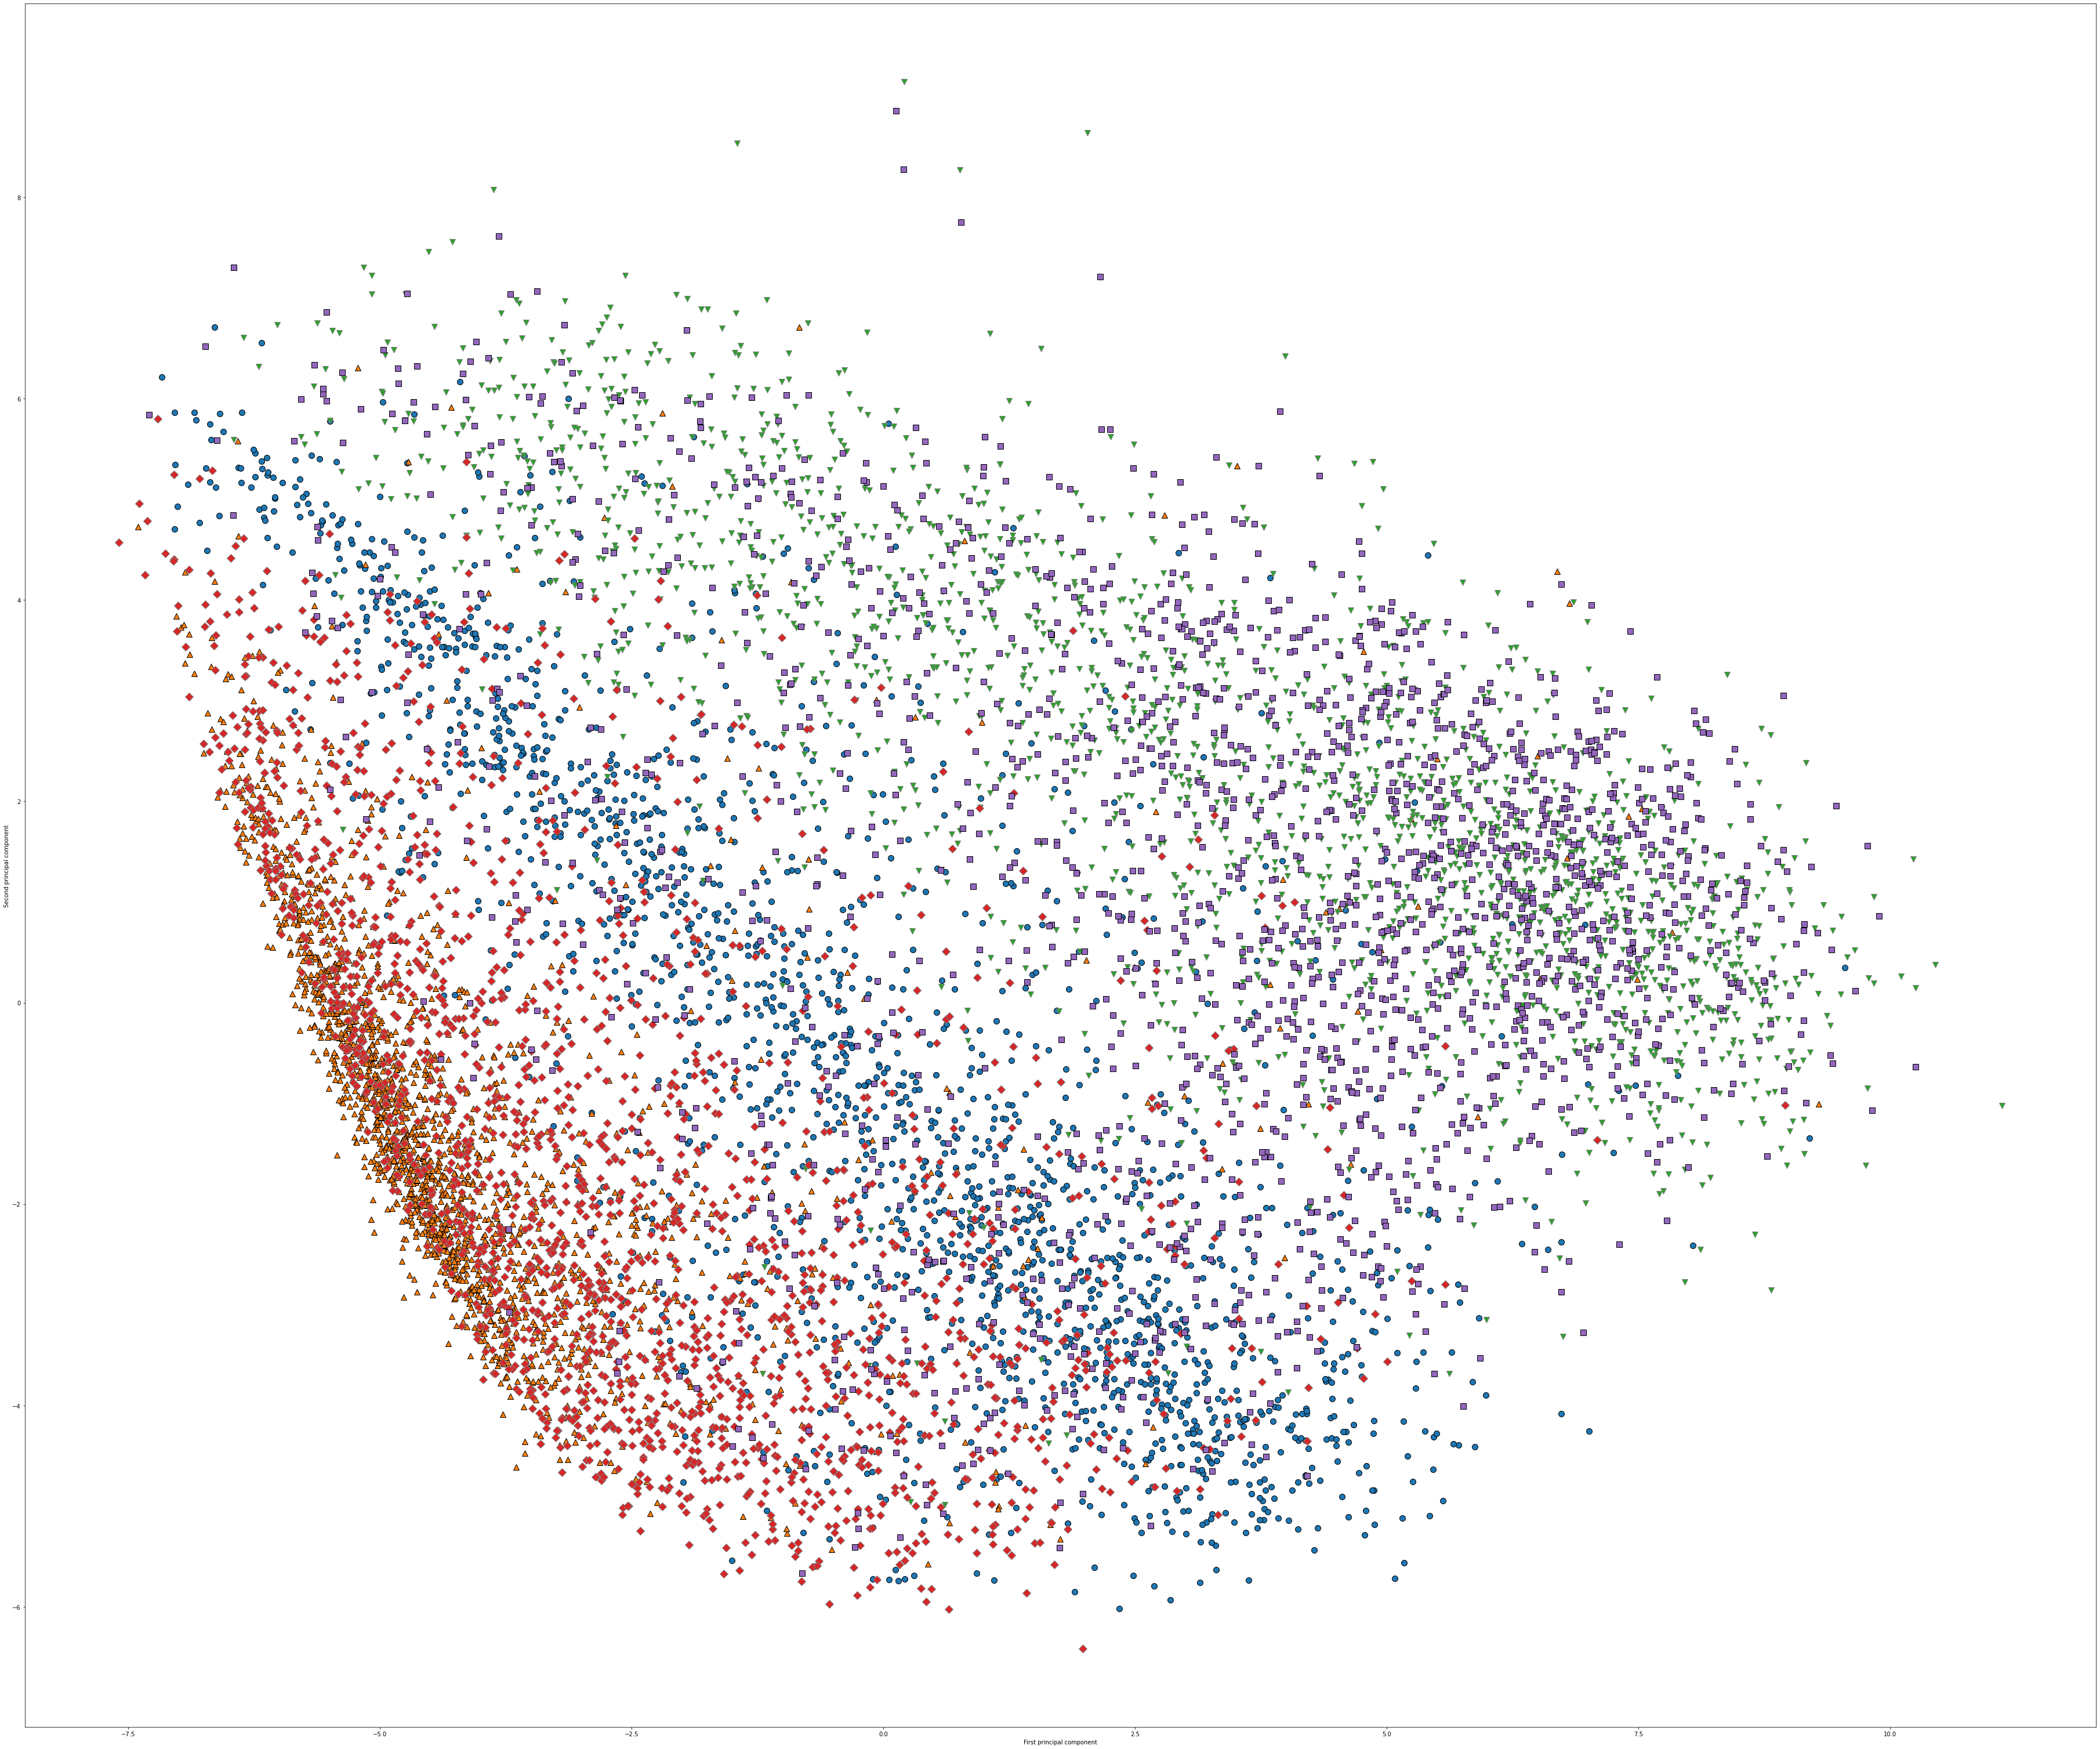

In [24]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_train_scaled_minmax = scaler_minmax.transform(X_train)

pca_minmax = PCA(n_components=2)
pca_minmax.fit(X_train_scaled_minmax)

X_train_pca_minmax = pca_minmax.transform(X_train_scaled_minmax)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(64, 64))
mglearn.discrete_scatter(X_train_pca_minmax[:, 0], X_train_pca_minmax[:, 1], y_train)
# plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
